# <font color='seablue'>**Naive Bayes Model**

### <font color='black'>**Learning Objectives**</font>
1. Load and explore datasets using Pandas, focusing on detecting duplicates and missing values.
2. Clean the dataset by removing duplicates and handling missing feature values.
3. Preprocess data through feature scaling or standardization.
4. Analyze the dataset for balance or imbalance.
Split the dataset into training and test sets.
5. Implement Naive Bayes from scratch for categorical data.
6. Evaluate model performance using accuracy, precision, recall, confusion matrix, and AUPRC.
8. Compare custom Naive Bayes implementation with Scikit-learn's CategoricalNB.



In [ ]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

###<font color='pink'>Load and Explore the dataset

In [ ]:
# downloading the Car Evaluation dataset from UC Irvine Machine Learning Repository
!wget -O dataset.zip https://archive.ics.uci.edu/static/public/19/car+evaluation.zip

--2025-08-11 12:59:40--  https://archive.ics.uci.edu/static/public/19/car+evaluation.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dataset.zip’

dataset.zip             [ <=>                ]   6.19K  --.-KB/s    in 0s      

2025-08-11 12:59:40 (81.6 MB/s) - ‘dataset.zip’ saved [6342]



In [ ]:
import zipfile

# Specify the name of the zip file
zip_file_path = 'dataset.zip'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('extracted_dataset')  # Extract to a folder named 'extracted_dataset'

In [ ]:
# Specify the path to the extracted CSV file
csv_file_path = 'extracted_dataset/car.data'  # Replace with the actual CSV file name

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

In [ ]:
# getting keys of dataset stored as bunch type
df.keys()

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [ ]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
# Assign the correct column names
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df['class'].unique() # 4 classes

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [ ]:
# Check for duplicate entries
duplicates = df.duplicated()

# Count the number of duplicate entries
num_duplicates = duplicates.sum()

print(f"Number of duplicate entries: {num_duplicates}")

Number of duplicate entries: 0


In [ ]:
# Remove duplicate entries
df = df.drop_duplicates()

# Verify that duplicates are removed
print(f"Number of duplicate entries after removal: {df.duplicated().sum()}")

Number of duplicate entries after removal: 0


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [ ]:
# Remove entries with missing feature values
df = df.dropna()

# Verify that missing values are removed
print("Missing values after removal:")
print(df.isnull().sum())

Missing values after removal:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


###<font color='pink'> Label Encoding the Categorical Features

In [ ]:
#convert textual data to numeric since Naive Baies requires numeric data
from sklearn.preprocessing import LabelEncoder

# Create a dictionary to hold the class mappings for each column
class_mappings = {}   # {'column': {class1:label1, class2:label2}}

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

    # Get the mapping of original classes to encoded labels
    mappings = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

    # Store the mapping in the dictionary
    class_mappings[column] = mappings

# Display the first few rows of the transformed DataFrame
print(df.head())

   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      0        0         2       2      2
1       3      3      0        0         2       0      2
2       3      3      0        0         1       1      2
3       3      3      0        0         1       2      2
4       3      3      0        0         1       0      2


In [ ]:
print(class_mappings)

{'buying': {'high': np.int64(0), 'low': np.int64(1), 'med': np.int64(2), 'vhigh': np.int64(3)}, 'maint': {'high': np.int64(0), 'low': np.int64(1), 'med': np.int64(2), 'vhigh': np.int64(3)}, 'doors': {'2': np.int64(0), '3': np.int64(1), '4': np.int64(2), '5more': np.int64(3)}, 'persons': {'2': np.int64(0), '4': np.int64(1), 'more': np.int64(2)}, 'lug_boot': {'big': np.int64(0), 'med': np.int64(1), 'small': np.int64(2)}, 'safety': {'high': np.int64(0), 'low': np.int64(1), 'med': np.int64(2)}, 'class': {'acc': np.int64(0), 'good': np.int64(1), 'unacc': np.int64(2), 'vgood': np.int64(3)}}


In [ ]:
#Assign y to the “class” variable and X to the rest of the variables
y = df[['class']].astype('int')
X = df.drop('class',axis=1)

In [ ]:
# statistical description before scaling
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.00000,1727.000000
mean,1.499131,1.499131,1.500869,1.000579,0.999421,1.00000,1.552982
std,1.118098,1.118098,1.118098,0.816615,0.816615,0.81697,0.876136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.500000,0.500000,1.000000,0.000000,0.000000,0.00000,1.000000
50%,1.000000,1.000000,2.000000,1.000000,1.000000,1.00000,2.000000
75%,2.000000,2.000000,2.500000,2.000000,2.000000,2.00000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.00000,3.000000


##### <font color='pink'>For Naive Bayes, particularly when working with categorical data or when implementing models like <font color='seablue'>CategoricalNB</font> or <font color='seablue'>MultinomialNB</font>, feature scaling or standardization is generally not necessary. This is because Naive Bayes models typically operate on categorical features or count-based data, where scaling doesn't affect the probability computations.</font>

##### <font color = 'pink'>For Naive Bayes models, plotting a correlation matrix is generally not a necessity because Naive Bayes assumes that features are conditionally independent given the class label.

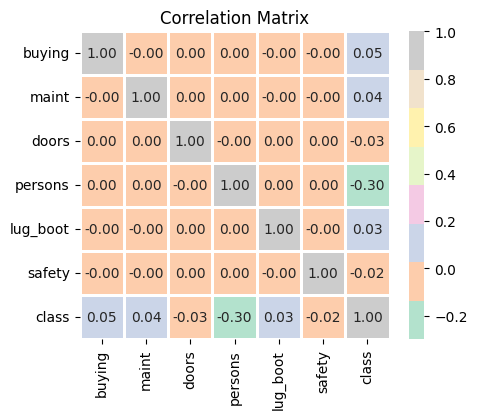

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix using seaborn
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='Pastel2', fmt='.2f', linewidths=1)
# Add titles and labels
plt.title('Correlation Matrix')
plt.show()

#####<font color='pink'>For categorical features, Naive Bayes works based on the frequency of categories rather than their distribution. Outliers in categorical data are less of a concern because they don't affect the probability calculations directly.

In [ ]:
# # Create a boxplot for each feature in the dataset
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=df)
# plt.title('Boxplot of Features')
# plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.show()

#####<font color='pink'>Check the class distribution of the dataset

<Axes: xlabel='class', ylabel='count'>

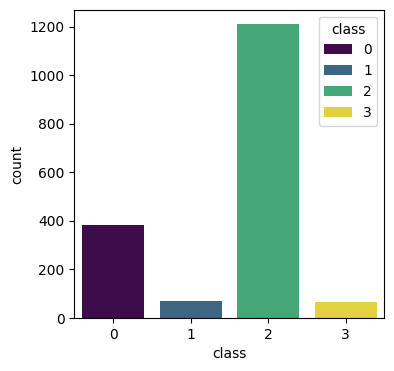

In [ ]:
df['class'].value_counts()
# Set the figure size
plt.figure(figsize=(4, 4))
# Create the count plot
sns.countplot(data=df, x="class", hue="class", palette='viridis')

### <font color='pink'> Split the dataset into train-validation-test (50-25-25)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

In [ ]:
print(type(X_train))  # Should be <class 'numpy.ndarray'> or <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#Handling the class imbalance problem
#SMOTE (Synthetic Minority Over-sampling Technique): Creates synthetic samples for the minority class.

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original counts: ", y_train.value_counts())
print(len(y_train))
print("Resampled counts: ", y_train_resampled.value_counts())
print(len(y_train_resampled))

y_train = y_train_resampled   # renaming them back for easy usage
X_train = X_train_resampled

Original counts:  class
2        848
0        266
1         52
3         42
Name: count, dtype: int64
1208
Resampled counts:  class
0        848
1        848
2        848
3        848
Name: count, dtype: int64
3392


In [ ]:
# converting df panda frames to numpy arrays
X_train = X_train.to_numpy()
X_val = X_val.to_numpy()
X_test = X_test.to_numpy()

y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

print(X_train.shape)  # (num_samples_train, num_features)
print(y_train.shape)  # (num_samples_train,)
print(X_val.shape)    # (num_samples_val, num_features)
print(y_val.shape)    # (num_samples_val,)
print(X_test.shape)   # (num_samples_test, num_features)
print(y_test.shape)   # (num_samples_test,)

(3392, 6)
(3392, 1)
(260, 6)
(260, 1)
(259, 6)
(259, 1)


In [ ]:
# Convert y_train, y_val, and y_test to 1D NumPy arrays
y_train = y_train.ravel()  # or y_train.squeeze()
y_val = y_val.ravel()      # or y_val.squeeze()
y_test = y_test.ravel()    # or y_test.squeeze()

In [ ]:
!pip install tqdm
from tqdm import tqdm

### <font color='pink'> From Scratch Implementation of Naive Bayes

In [ ]:
import numpy as np

class NaiveBayesClassifier:
    def __init__(self):
        # Initialize dictionaries to store prior probabilities and likelihoods
        self.prior_prob = {}  # Prior probabilities for each class
        self.likelihoods = {}  # Likelihoods for feature values given each class

    def fit(self, X, y):
        # Identify unique classes and number of features from the training data
        self.classes = np.unique(y)  # Unique class labels
        self.num_features = X.shape[1]  # Number of features

        # Compute prior probabilities based on class frequencies p(C)
        self.prior_prob = self._calculate_prior_probabilities(y)

        # Compute likelihoods for each feature value given each class p(x|C)
        self.likelihoods = self._calculate_likelihoods(X, y)

    def _calculate_prior_probabilities(self, y):
        # Calculate prior probabilities of each class
        classes, counts = np.unique(y, return_counts=True)  # Get unique classes and their counts
        total_count = len(y)  # Total number of samples
        # Compute prior probability for each class and return as a dictionary
        return dict(zip(classes, counts / total_count))

    def _calculate_likelihoods(self, X, y):
        # Initialize a dictionary to store likelihoods for each class and feature
        likelihoods = {cls: {i: {} for i in range(self.num_features)} for cls in self.classes}

        for cls in tqdm(self.classes):
            # Filter the training data for the current class
            X_cls = X[y == cls]
            num_cls = X_cls.shape[0]  # Number of samples for this class

            for feature_idx in range(self.num_features):
                # Calculate feature value counts and their probabilities within this class
                feature_values, counts = np.unique(X_cls[:, feature_idx], return_counts=True)
                # Store the likelihoods as a dictionary of feature values and their probabilities
                likelihoods[cls][feature_idx] = dict(zip(feature_values, counts / num_cls))

        return likelihoods

    def predict(self, X):
        # List to store the predicted class for each sample
        predictions = []

        for x in X:
            # Initialize scores for each class with the log of the prior probability
            class_scores = {cls: np.log(prior) for cls, prior in self.prior_prob.items()}

            for cls in self.classes:
                for feature_idx, value in enumerate(x):
                    # Get the likelihoods of the feature value given the class
                    feature_likelihoods = self.likelihoods[cls].get(feature_idx, {})
                    # Update the class score by adding the log of the feature likelihood
                    # Use a small value (1e-10) if the feature value was not seen during training
                    class_scores[cls] += np.log(feature_likelihoods.get(value, 1e-10))

            # Predict the class with the highest score
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)

        return np.array(predictions)

### <font color='pink'> Train and Test Results of Custom NB

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

# Initialize the custom Naive Bayes classifier
nb_classifier = NaiveBayesClassifier()

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)

# Validate the model using the validation set
y_val_pred = nb_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

100%|██████████| 4/4 [00:00<00:00, 2233.98it/s]

Validation Accuracy: 0.84


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Make predictions on the test set
y_test_pred = nb_classifier.predict(X_test)
print(len(y_test_pred))

259


Confusion Matrix:
[[ 57   5   0   4]
 [  0   3   0   2]
 [ 21   1 156   0]
 [  0   0   0  10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        66
           1       0.33      0.60      0.43         5
           2       1.00      0.88      0.93       178
           3       0.62      1.00      0.77        10

    accuracy                           0.87       259
   macro avg       0.67      0.84      0.73       259
weighted avg       0.90      0.87      0.88       259



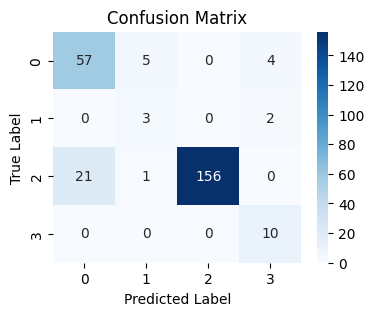

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=nb_classifier.classes)

# Convert class labels to strings if they are numeric
class_names = [str(cls) for cls in nb_classifier.classes]

# Generate classification report
report = classification_report(y_test, y_test_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("\nClassification Report:")
print(report)

# Plotting confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_classifier.classes, yticklabels=nb_classifier.classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

FPR:  {0: array([0.        , 0.10880829, 1.        ]), 1: array([0.        , 0.02362205, 1.        ]), 2: array([0., 0., 1.]), 3: array([0.        , 0.02409639, 1.        ])}


TPR:  {0: array([0.        , 0.86363636, 1.        ]), 1: array([0. , 0.6, 1. ]), 2: array([0.        , 0.87640449, 1.        ]), 3: array([0., 1., 1.])}


ROC_AUC:  {0: np.float64(0.8774140367404617), 1: np.float64(0.7881889763779528), 2: np.float64(0.9382022471910112), 3: np.float64(0.9879518072289157)}




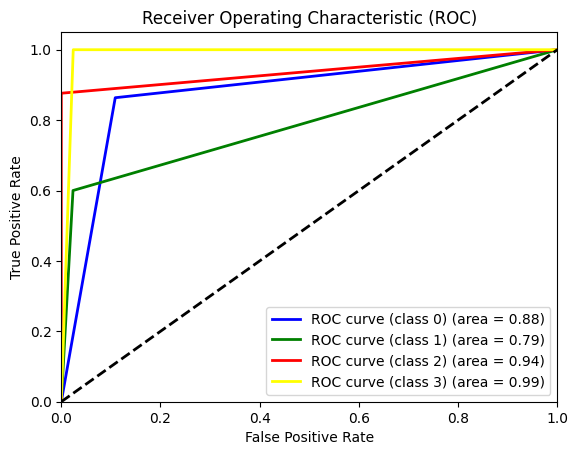

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# Binarize the output for ROC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))  # one-hot encoding
y_pred_prob = label_binarize(y_test_pred, classes=np.unique(y_test_pred))
n_classes = y_test_binarized.shape[1] # 4
# ROC curve and ROC AUC score
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])

print("FPR: ", fpr)
print("\n")

print("TPR: ", tpr)
print("\n")

print("ROC_AUC: ", roc_auc)
print("\n")

# Plot ROC curves for each class
plt.figure()
colors = ['blue', 'green', 'red','yellow']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

### <font color='pink'> Sklearn's Categorical Naive Bayes

In [ ]:
#CategoricalNB classifier from ScikitLearn Library
from sklearn.naive_bayes import CategoricalNB

In [ ]:
# Initialize the CategoricalNB classifier
cat_nb_classifier = CategoricalNB()  # fit_prior = True by default

# Fit the model on the training data
cat_nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = cat_nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


Confusion Matrix:
[[ 56   5   0   5]
 [  0   3   0   2]
 [ 21   1 156   0]
 [  0   0   0  10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.78        66
           1       0.33      0.60      0.43         5
           2       1.00      0.88      0.93       178
           3       0.59      1.00      0.74        10

    accuracy                           0.87       259
   macro avg       0.66      0.83      0.72       259
weighted avg       0.90      0.87      0.88       259



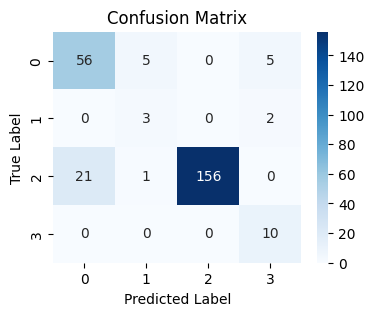

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=cat_nb_classifier.classes_)

# Convert class labels to strings if they are numeric
class_names = [str(cls) for cls in cat_nb_classifier.classes_]

# Generate classification report
report = classification_report(y_test, y_test_pred, target_names=class_names)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("\nClassification Report:")
print(report)

# Plotting confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### <font color ="pink"> Custom Naive Bayes Using Kernel Density Estimation (KDE)

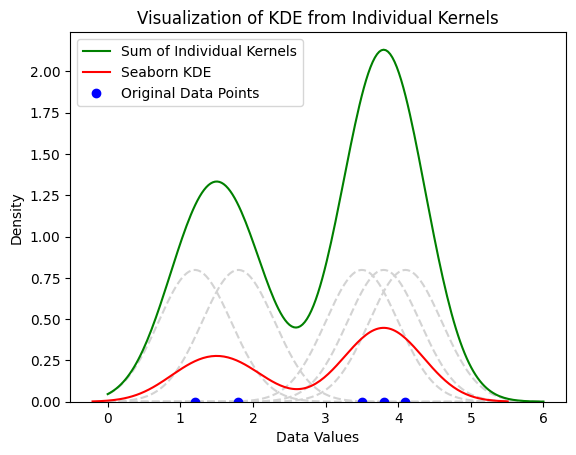

In [ ]:
from scipy.stats import norm

data = np.array([1.2, 1.8, 3.5, 3.8, 4.1])
x_range = np.linspace(0, 6, 200)
bandwidth = 0.5

kernels = []
for point in data:
    kernel = norm.pdf(x_range, point, bandwidth)
    kernels.append(kernel)
    plt.plot(x_range, kernel, color='lightgray', linestyle='--')
summed_kernels = np.sum(kernels, axis=0)
plt.plot(x_range, summed_kernels, color='green', label='Sum of Individual Kernels')
sns.kdeplot(x=data, bw_adjust=bandwidth, color='red', label='Seaborn KDE')
plt.plot(data, np.zeros_like(data), 'o', color='blue', label='Original Data Points')
plt.title('Visualization of KDE from Individual Kernels')
plt.xlabel('Data Values')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KernelDensity

# parameters for KDE
kde_kernel = 'gaussian'
kde_bandwidth = 0.2 # this is a crucial parameter

# first we calculate the priors
classes = np.unique(y_train)
class_priors = {}
for c in classes:
  class_priors[c] = np.mean(y_train == c)

# create a dictionary where keys are classes and values are lists of KDE models (one per feature)
KDE_per_class_feature = {}
for c in classes:
  KDE_per_class_feature[c] = []
  x_c = X_train[y_train == c]
  for i in range(x_c.shape[1]): # iterating over features
    # KernelDensity expects a 2D array (n_samples, n_features)
    kde = KernelDensity(kernel=kde_kernel, bandwidth=kde_bandwidth).fit(x_c[:, i].reshape(-1, 1))
    KDE_per_class_feature[c].append(kde)


y_pred_KDE = []
for i in range(X_test.shape[0]):
  sample = X_test[i]
  log_prob_per_class = []
  for c in classes:
    # log of the class prior P(C)
    class_log_prior = np.log(class_priors[c])
    feature_log_likelihoods = 0.0
    # sum the log likelihoods for each feature given the class P(X_j | C)
    for j in range(sample.shape[0]):
      # score_samples returns the log-likelihood of each sample under the KDE model
      feature_log_likelihoods += KDE_per_class_feature[c][j].score_samples(sample[j].reshape(-1, 1))[0]

    # total log probability is log(P(C)) + sum(log(P(X_j|C)))
    log_prob_per_class.append(class_log_prior + feature_log_likelihoods)

  # predict the class with the highest log probability
  predicted_class_index = np.argmax(log_prob_per_class)
  y_pred_KDE.append(classes[np.argmax(log_prob_per_class)])

y_pred_KDE = np.array(y_pred_KDE)

# Evaluate the model
accuracy_kde = accuracy_score(y_test, y_pred_KDE)
print(f"KDE Naive Bayes Accuracy (bandwidth={kde_bandwidth}): {accuracy_kde:.2f}")


KDE Naive Bayes Accuracy (bandwidth=0.2): 0.87


Confusion Matrix:
[[ 57   5   0   4]
 [  0   3   0   2]
 [ 21   1 156   0]
 [  0   0   0  10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        66
           1       0.33      0.60      0.43         5
           2       1.00      0.88      0.93       178
           3       0.62      1.00      0.77        10

    accuracy                           0.87       259
   macro avg       0.67      0.84      0.73       259
weighted avg       0.90      0.87      0.88       259



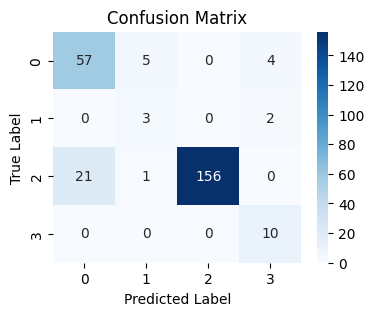

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_KDE, labels=cat_nb_classifier.classes_)

# Convert class labels to strings if they are numeric
class_names = [str(cls) for cls in cat_nb_classifier.classes_]

# Generate classification report
report = classification_report(y_test, y_pred_KDE, target_names=class_names)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("\nClassification Report:")
print(report)

# Plotting confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Assignment 3

### <font color = "orange"> Q1. Load the texture dataset from OpenML: https://www.openml.org/search?type=data&sort=version&status=any&order=asc&exact_name=texture&id=40499 (1 Mark)

### <font color = "orange"> Q2. Show the class distribution of the dataset and state whether the dataset is well balanced or not. (2 Marks)

### <font color = "orange"> Q3. Split the dataset into training and test sets (80%-20%) (1 Marks)

### <font color = "orange">Q4. Scale the features of the dataset appropriately such that all the features take values in the same range. (2 Marks)

### <font color = "orange">Q5. Design a Gaussian Naive Bayes’ (NB) classifier and fit it on the training set (6 Marks)

### <font color = "orange">Q6. Evaluate the test set using the Gaussian NB classifier you learned from the training data and report the performance in terms of accuracy, precision, recall and confusion matrix. (2 Marks)

### <font color = "orange">Q7. Using scikit-learn's implementation of Gaussian NB classifier, fit the training data. (4 Marks)

### <font color="orange">Q8. Evaluate the scikit-learn's Gaussian NB model on the test set. How does the performance of this model compare with your custom implementation? (2 Marks)